In [ ]:
# What is the maximum and minimum duration of power cut on each of the days data is collected 

In [ ]:
# The libraries required for these operations

In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#For data from Firebase, use the code below:
from google.colab import files
uploaded = files.upload()
data = json.load(open('powerstatus.json'))
data_ = []
for uid in data.keys():
        data_.append(data[uid])
pdata_ev = pd.DataFrame(json.loads(line) for line in data_)

Saving powerstatus.json to powerstatus.json


In [ ]:
data_

['{"Timestamp":"2017-06-16 10:19:22.055+0530","Type":"EVENT","Status":"POWER_DISCONNECTED","Plugged":"Unplugged","Level":"100.0","Health":"Good","Voltage":"4.286","Temperature":"29.7","IMEI":"352951060254248"}',
 '{"Timestamp":"2017-06-16 10:22:12.847+0530","Type":"EVENT","Status":"POWER_CONNECTED","Plugged":"AC","Level":"100.0","Health":"Good","Voltage":"4.33","Temperature":"29.8","IMEI":"352951060254248"}',
 '{"Timestamp":"2017-06-16 12:19:57.946+0530","Type":"EVENT","Status":"POWER_DISCONNECTED","Plugged":"Unplugged","Level":"100.0","Health":"Good","Voltage":"4.235","Temperature":"30.1","IMEI":"352951060254248"}',
 '{"Timestamp":"2017-06-16 15:19:01.085+0530","Type":"EVENT","Status":"POWER_CONNECTED","Plugged":"AC","Level":"97.0","Health":"Good","Voltage":"4.331","Temperature":"28.9","IMEI":"352951060254248"}',
 '{"Timestamp":"2017-06-16 15:19:02.123+0530","Type":"EVENT","Status":"POWER_DISCONNECTED","Plugged":"Unplugged","Level":"97.0","Health":"Good","Voltage":"3.993","Temperature

In [ ]:
# The data is now in the dataframe of pandas. We are interested in two columns only to answer the question of 
# maximum and minimum power cut durations

In [ ]:
# Hence, we work with "Events", "Timestamp"

In [ ]:
# POWER_DISCONNECTED is an event of disconnection of phone from power source/a power cut event

In [ ]:
# Similarly, POWER_CONNECTED for event when the power is available.

In [ ]:
pdata_ev

,Timestamp,Type,Status,Plugged,Level,Health,Voltage,Temperature,IMEI
0,2017-06-16 10:19:22.055+0530,EVENT,POWER_DISCONNECTED,Unplugged,100.0,Good,4.286,29.7,352951060254248
1,2017-06-16 10:22:12.847+0530,EVENT,POWER_CONNECTED,AC,100.0,Good,4.33,29.8,352951060254248
2,2017-06-16 12:19:57.946+0530,EVENT,POWER_DISCONNECTED,Unplugged,100.0,Good,4.235,30.1,352951060254248
3,2017-06-16 15:19:01.085+0530,EVENT,POWER_CONNECTED,AC,97.0,Good,4.331,28.9,352951060254248
4,2017-06-16 15:19:02.123+0530,EVENT,POWER_DISCONNECTED,Unplugged,97.0,Good,3.993,28.6,352951060254248
5,2017-06-16 15:19:43.564+0530,EVENT,POWER_CONNECTED,AC,100.0,Good,4.33,28.8,352951060254248
6,2017-06-16 22:05:14.109+0530,EVENT,POWER_DISCONNECTED,Unplugged,100.0,Good,4.227,28.8,352951060254248
7,2017-06-16 22:17:37.271+0530,EVENT,POWER_CONNECTED,AC,100.0,Good,4.328,28.7,352951060254248
8,2017-06-17 13:06:09.128+0530,EVENT,POWER_DISCONNECTED,Unplugged,100.0,Good,4.223,28.3,352951060254248
9,2017-06-17 13:14:12.169+0530,EVENT,POWER_CONNECTED,AC,100.0,Good,4.33,28.3,352951060254248


In [ ]:
# We convert the timestamp in string format to Datetime format in pandas in order to be able to extract Year, month, date, hours, minutes, seconds, miliseconds and timezone from within the pandas libraries

In [4]:
pdata_ev['Timestamp'] = pd.to_datetime(pdata_ev['Timestamp'])

In [ ]:
#Look at the data. It is not arranged in a sequence. We need to cluster them in groups of day since we are interested in looking at durations of power cuts on each day

In [5]:
pdata_ev_days = pdata_ev.set_index('Timestamp')

In [6]:
pdata_ev_days

,Type,Status,Plugged,Level,Health,Voltage,Temperature,IMEI
Timestamp,,,,,,,,
2017-06-16 10:19:22.055000+05:30,EVENT,POWER_DISCONNECTED,Unplugged,100.0,Good,4.286,29.7,352951060254248
2017-06-16 10:22:12.847000+05:30,EVENT,POWER_CONNECTED,AC,100.0,Good,4.33,29.8,352951060254248
2017-06-16 12:19:57.946000+05:30,EVENT,POWER_DISCONNECTED,Unplugged,100.0,Good,4.235,30.1,352951060254248
2017-06-16 15:19:01.085000+05:30,EVENT,POWER_CONNECTED,AC,97.0,Good,4.331,28.9,352951060254248
2017-06-16 15:19:02.123000+05:30,EVENT,POWER_DISCONNECTED,Unplugged,97.0,Good,3.993,28.6,352951060254248
2017-06-16 15:19:43.564000+05:30,EVENT,POWER_CONNECTED,AC,100.0,Good,4.33,28.8,352951060254248
2017-06-16 22:05:14.109000+05:30,EVENT,POWER_DISCONNECTED,Unplugged,100.0,Good,4.227,28.8,352951060254248
2017-06-16 22:17:37.271000+05:30,EVENT,POWER_CONNECTED,AC,100.0,Good,4.328,28.7,352951060254248
2017-06-17 13:06:09.128000+05:30,EVENT,POWER_DISCONNECTED,Unplugged,100.0,Good,4.223,28.3,352951060254248


In [8]:
#Grouping the data day wise
pdata_ev_days_grp = pdata_ev_days.groupby(pd.Grouper(freq='D'))

In [9]:
pdata_ev_days_grp

In [10]:
type(pdata_ev_days_grp)

pandas.core.groupby.generic.DataFrameGroupBy

In [11]:
pdata_ev_days_grp.describe()

Type                ...   IMEI                      
                          count unique    top  ... unique              top freq
Timestamp                                      ...                             
2017-06-16 00:00:00+05:30     8      1  EVENT  ...      1  352951060254248    8
2017-06-17 00:00:00+05:30     2      1  EVENT  ...      1  352951060254248    2
2017-06-18 00:00:00+05:30    12      1  EVENT  ...      1  352951060254248   12
2017-06-19 00:00:00+05:30    28      1  EVENT  ...      1  352951060254248   28
2017-06-20 00:00:00+05:30     3      1  EVENT  ...      1  352951060254248    3

[5 rows x 32 columns]

In [14]:
pdata_ev_days_grp_count = pdata_ev_days_grp.count()

In [15]:
pdata_ev_days_grp_count

,Type,Status,Plugged,Level,Health,Voltage,Temperature,IMEI
Timestamp,,,,,,,,
2017-06-16 00:00:00+05:30,8,8,8,8,8,8,8,8
2017-06-17 00:00:00+05:30,2,2,2,2,2,2,2,2
2017-06-18 00:00:00+05:30,12,12,12,12,12,12,12,12
2017-06-19 00:00:00+05:30,28,28,28,28,28,28,28,28
2017-06-20 00:00:00+05:30,3,3,3,3,3,3,3,3


In [ ]:
# Plot number of events vs day

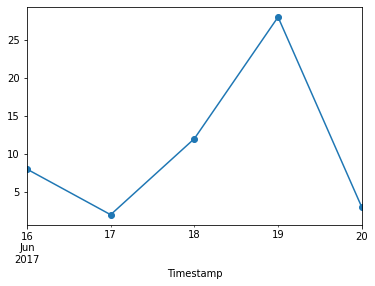

In [16]:
# Plot Number of Events to Date
pdata_ev_days_grp_count.Type.plot(marker='o')

In [17]:
#Data on a date
pdata_ev_days_grp_ = pdata_ev_days_grp.get_group('2017-06-18 00:00:00+05:30')

In [18]:
pdata_ev_days_grp_

,Type,Status,Plugged,Level,Health,Voltage,Temperature,IMEI
Timestamp,,,,,,,,
2017-06-18 09:02:02.205000+05:30,EVENT,POWER_DISCONNECTED,Unplugged,100.0,Good,4.223,28.0,352951060254248
2017-06-18 09:29:34.170000+05:30,EVENT,POWER_CONNECTED,AC,100.0,Good,4.328,27.7,352951060254248
2017-06-18 11:36:36.260000+05:30,EVENT,POWER_DISCONNECTED,Unplugged,100.0,Good,4.22,28.5,352951060254248
2017-06-18 12:09:41.005000+05:30,EVENT,POWER_CONNECTED,AC,100.0,Good,4.331,28.4,352951060254248
2017-06-18 14:47:00.786000+05:30,EVENT,POWER_DISCONNECTED,Unplugged,100.0,Good,4.237,29.5,352951060254248
2017-06-18 14:47:22.638000+05:30,EVENT,POWER_CONNECTED,AC,100.0,Good,4.332,29.7,352951060254248
2017-06-18 14:48:32.668000+05:30,EVENT,POWER_DISCONNECTED,Unplugged,100.0,Good,4.24,29.6,352951060254248
2017-06-18 15:23:05.677000+05:30,EVENT,POWER_CONNECTED,AC,100.0,Good,4.33,29.5,352951060254248
2017-06-18 19:58:36.577000+05:30,EVENT,POWER_DISCONNECTED,Unplugged,100.0,Good,4.235,30.2,352951060254248


In [20]:
pdata_ev_days_grp_['Time'] = pdata_ev_days_grp_.index

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
pdata_ev_days_grp_

,Type,Status,Plugged,Level,Health,Voltage,Temperature,IMEI,Time
Timestamp,,,,,,,,,
2017-06-18 09:02:02.205000+05:30,EVENT,POWER_DISCONNECTED,Unplugged,100.0,Good,4.223,28.0,352951060254248,2017-06-18 09:02:02.205000+05:30
2017-06-18 09:29:34.170000+05:30,EVENT,POWER_CONNECTED,AC,100.0,Good,4.328,27.7,352951060254248,2017-06-18 09:29:34.170000+05:30
2017-06-18 11:36:36.260000+05:30,EVENT,POWER_DISCONNECTED,Unplugged,100.0,Good,4.22,28.5,352951060254248,2017-06-18 11:36:36.260000+05:30
2017-06-18 12:09:41.005000+05:30,EVENT,POWER_CONNECTED,AC,100.0,Good,4.331,28.4,352951060254248,2017-06-18 12:09:41.005000+05:30
2017-06-18 14:47:00.786000+05:30,EVENT,POWER_DISCONNECTED,Unplugged,100.0,Good,4.237,29.5,352951060254248,2017-06-18 14:47:00.786000+05:30
2017-06-18 14:47:22.638000+05:30,EVENT,POWER_CONNECTED,AC,100.0,Good,4.332,29.7,352951060254248,2017-06-18 14:47:22.638000+05:30
2017-06-18 14:48:32.668000+05:30,EVENT,POWER_DISCONNECTED,Unplugged,100.0,Good,4.24,29.6,352951060254248,2017-06-18 14:48:32.668000+05:30
2017-06-18 15:23:05.677000+05:30,EVENT,POWER_CONNECTED,AC,100.0,Good,4.33,29.5,352951060254248,2017-06-18 15:23:05.677000+05:30
2017-06-18 19:58:36.577000+05:30,EVENT,POWER_DISCONNECTED,Unplugged,100.0,Good,4.235,30.2,352951060254248,2017-06-18 19:58:36.577000+05:30


In [ ]:
# To extract the durations of power cut and power on from events, we subtract the event with the previous event

In [22]:
pdata_ev_days_grp_['delta'] = (pdata_ev_days_grp_['Time']-pdata_ev_days_grp_['Time'].shift())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
type(pdata_ev_days_grp_)

pandas.core.frame.DataFrame

In [24]:
pdata_ev_days_grp_

,Type,Status,Plugged,Level,Health,Voltage,Temperature,IMEI,Time,delta
Timestamp,,,,,,,,,,
2017-06-18 09:02:02.205000+05:30,EVENT,POWER_DISCONNECTED,Unplugged,100.0,Good,4.223,28.0,352951060254248,2017-06-18 09:02:02.205000+05:30,NaT
2017-06-18 09:29:34.170000+05:30,EVENT,POWER_CONNECTED,AC,100.0,Good,4.328,27.7,352951060254248,2017-06-18 09:29:34.170000+05:30,0 days 00:27:31.965000
2017-06-18 11:36:36.260000+05:30,EVENT,POWER_DISCONNECTED,Unplugged,100.0,Good,4.22,28.5,352951060254248,2017-06-18 11:36:36.260000+05:30,0 days 02:07:02.090000
2017-06-18 12:09:41.005000+05:30,EVENT,POWER_CONNECTED,AC,100.0,Good,4.331,28.4,352951060254248,2017-06-18 12:09:41.005000+05:30,0 days 00:33:04.745000
2017-06-18 14:47:00.786000+05:30,EVENT,POWER_DISCONNECTED,Unplugged,100.0,Good,4.237,29.5,352951060254248,2017-06-18 14:47:00.786000+05:30,0 days 02:37:19.781000
2017-06-18 14:47:22.638000+05:30,EVENT,POWER_CONNECTED,AC,100.0,Good,4.332,29.7,352951060254248,2017-06-18 14:47:22.638000+05:30,0 days 00:00:21.852000
2017-06-18 14:48:32.668000+05:30,EVENT,POWER_DISCONNECTED,Unplugged,100.0,Good,4.24,29.6,352951060254248,2017-06-18 14:48:32.668000+05:30,0 days 00:01:10.030000
2017-06-18 15:23:05.677000+05:30,EVENT,POWER_CONNECTED,AC,100.0,Good,4.33,29.5,352951060254248,2017-06-18 15:23:05.677000+05:30,0 days 00:34:33.009000
2017-06-18 19:58:36.577000+05:30,EVENT,POWER_DISCONNECTED,Unplugged,100.0,Good,4.235,30.2,352951060254248,2017-06-18 19:58:36.577000+05:30,0 days 04:35:30.900000


In [ ]:
pdata_ev_days_grp_ = pdata_ev_days_grp_.fillna(pd.Timedelta(seconds=0))

In [25]:
pdata_ev_days_grp_

,Type,Status,Plugged,Level,Health,Voltage,Temperature,IMEI,Time,delta
Timestamp,,,,,,,,,,
2017-06-18 09:02:02.205000+05:30,EVENT,POWER_DISCONNECTED,Unplugged,100.0,Good,4.223,28.0,352951060254248,2017-06-18 09:02:02.205000+05:30,NaT
2017-06-18 09:29:34.170000+05:30,EVENT,POWER_CONNECTED,AC,100.0,Good,4.328,27.7,352951060254248,2017-06-18 09:29:34.170000+05:30,0 days 00:27:31.965000
2017-06-18 11:36:36.260000+05:30,EVENT,POWER_DISCONNECTED,Unplugged,100.0,Good,4.22,28.5,352951060254248,2017-06-18 11:36:36.260000+05:30,0 days 02:07:02.090000
2017-06-18 12:09:41.005000+05:30,EVENT,POWER_CONNECTED,AC,100.0,Good,4.331,28.4,352951060254248,2017-06-18 12:09:41.005000+05:30,0 days 00:33:04.745000
2017-06-18 14:47:00.786000+05:30,EVENT,POWER_DISCONNECTED,Unplugged,100.0,Good,4.237,29.5,352951060254248,2017-06-18 14:47:00.786000+05:30,0 days 02:37:19.781000
2017-06-18 14:47:22.638000+05:30,EVENT,POWER_CONNECTED,AC,100.0,Good,4.332,29.7,352951060254248,2017-06-18 14:47:22.638000+05:30,0 days 00:00:21.852000
2017-06-18 14:48:32.668000+05:30,EVENT,POWER_DISCONNECTED,Unplugged,100.0,Good,4.24,29.6,352951060254248,2017-06-18 14:48:32.668000+05:30,0 days 00:01:10.030000
2017-06-18 15:23:05.677000+05:30,EVENT,POWER_CONNECTED,AC,100.0,Good,4.33,29.5,352951060254248,2017-06-18 15:23:05.677000+05:30,0 days 00:34:33.009000
2017-06-18 19:58:36.577000+05:30,EVENT,POWER_DISCONNECTED,Unplugged,100.0,Good,4.235,30.2,352951060254248,2017-06-18 19:58:36.577000+05:30,0 days 04:35:30.900000


In [ ]:
# Isolate power cut duration only by neglecting power on durations

In [26]:
pdata_ev_days_grp_powercutduration = pdata_ev_days_grp_.loc[pdata_ev_days_grp_['Status'] == 'POWER_CONNECTED']

In [ ]:
pdata_ev_days_grp_powercutduration

,Type,Status,Plugged,Level,Health,Voltage,Temperature,IMEI,Time,delta
Timestamp,,,,,,,,,,
2017-06-18 09:29:34.170000+05:30,EVENT,POWER_CONNECTED,AC,100.0,Good,4.328,27.7,352951060254248,2017-06-18 09:29:34.170000+05:30,00:27:31.965000
2017-06-18 12:09:41.005000+05:30,EVENT,POWER_CONNECTED,AC,100.0,Good,4.331,28.4,352951060254248,2017-06-18 12:09:41.005000+05:30,00:33:04.745000
2017-06-18 14:47:22.638000+05:30,EVENT,POWER_CONNECTED,AC,100.0,Good,4.332,29.7,352951060254248,2017-06-18 14:47:22.638000+05:30,00:00:21.852000
2017-06-18 15:23:05.677000+05:30,EVENT,POWER_CONNECTED,AC,100.0,Good,4.33,29.5,352951060254248,2017-06-18 15:23:05.677000+05:30,00:34:33.009000
2017-06-18 20:05:14.067000+05:30,EVENT,POWER_CONNECTED,AC,100.0,Good,4.332,30.5,352951060254248,2017-06-18 20:05:14.067000+05:30,00:06:37.490000
2017-06-18 21:31:05.648000+05:30,EVENT,POWER_CONNECTED,AC,100.0,Good,4.332,30.5,352951060254248,2017-06-18 21:31:05.648000+05:30,00:02:31.870000


In [ ]:
#Maximum duration of Power cut
max(pdata_ev_days_grp_powercutduration.delta)

Timedelta('0 days 00:34:33.009000')

In [ ]:
#Minimum duration of Power cut
min(pdata_ev_days_grp_powercutduration.delta)

Timedelta('0 days 00:00:21.852000')